# Aprendizaje Supervisado con Scikit-learn

## Introducción

En este notebook, exploraremos un ejemplo sencillo de aprendizaje supervisado utilizando la popular biblioteca de Python, Scikit-learn. Nos enfocaremos en un problema de **clasificación**, donde nuestro objetivo será predecir la especie de una flor (Iris) en función de sus características.

Antes de empezar, hablemos un poco sobre el flujo de trabajo típico en un problema de aprendizaje supervisado.

1. **Preparación y exploración de los datos**: En esta etapa, cargamos y preparamos los datos para el modelado. Esto puede incluir la limpieza de los datos, exploración de los mismos para entenderlos, la selección de características y la división de los datos en conjuntos de entrenamiento y prueba.

2. **Selección del modelo**: En esta etapa, seleccionamos el modelo o algoritmo que se utilizará para entrenar el modelo. La elección del modelo depende del tipo de problema (clasificación, regresión, etc.) y de las características de los datos.

3. **Entrenamiento del modelo**: En esta etapa, entrenamos el modelo utilizando los datos de entrenamiento. El modelo ajusta sus parámetros para minimizar la función de pérdida o maximizar la función de puntuación.

4. **Evaluación del modelo**: En esta etapa, evaluamos el rendimiento del modelo utilizando los datos de prueba. Esto nos da una idea de cómo se desempeñará el modelo en la práctica.

5. **Ajuste del modelo**: En esta etapa, ajustamos los hiperparámetros del modelo para mejorar su rendimiento. Esto puede incluir la selección de características, la selección del modelo y la optimización de los hiperparámetros.

<div align="center">
    <img src="https://www.researchgate.net/publication/342778782/figure/fig1/AS:911026463723538@1594217043408/Flow-chart-for-machine-learning-workflow.png" width="800" style="border: 1px solid black; border-radius: 10px;">
    <p><strong>Figura 1:</strong> El flujo común de Aprendizaje automático. </p>
</div>


## 1. Importar las bibliotecas necesarias

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## 2. Cargar el dataset

Utilizaremos el famoso dataset "Iris", que viene incluido en Scikit-learn.
Este set de datos contiene información sobre 3 especies de flores Iris: Iris setosa, Iris versicolor e Iris virginica. Cada flor se caracteriza por 4 atributos: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.
<div style="text-align:center">
<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/0*11IwZmSKXw77eYz5" width="900" style="border: 1px solid black; border-radius: 10px;">

<p><strong>Figura 2:</strong> Flores Iris </p>
</div>

In [31]:
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

Convertimos los datos a un DataFrame de Pandas para facilitar su visualización y manipulación.
Un DataFrame es una estructura de datos tabular bidimensional con etiquetas en los ejes (filas y columnas). Se parece mucho a una hoja de cálculo o una tabla SQL.


In [32]:
df = pd.DataFrame(data, columns=feature_names)
df["species"] = pd.Categorical.from_codes(target, target_names)

## 3. Explorar el dataset

Veamos las primeras filas del dataset:

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Descripción de las características:

 *   **sepal length (cm):** Longitud del sépalo en centímetros.
 *   **sepal width (cm):** Ancho del sépalo en centímetros.
 *   **petal length (cm):** Longitud del pétalo en centímetros.
 *   **petal width (cm):** Ancho del pétalo en centímetros.
 *   **species:** Especie de la flor (setosa, versicolor, virginica).

Visualicemos la distribución de las especies:

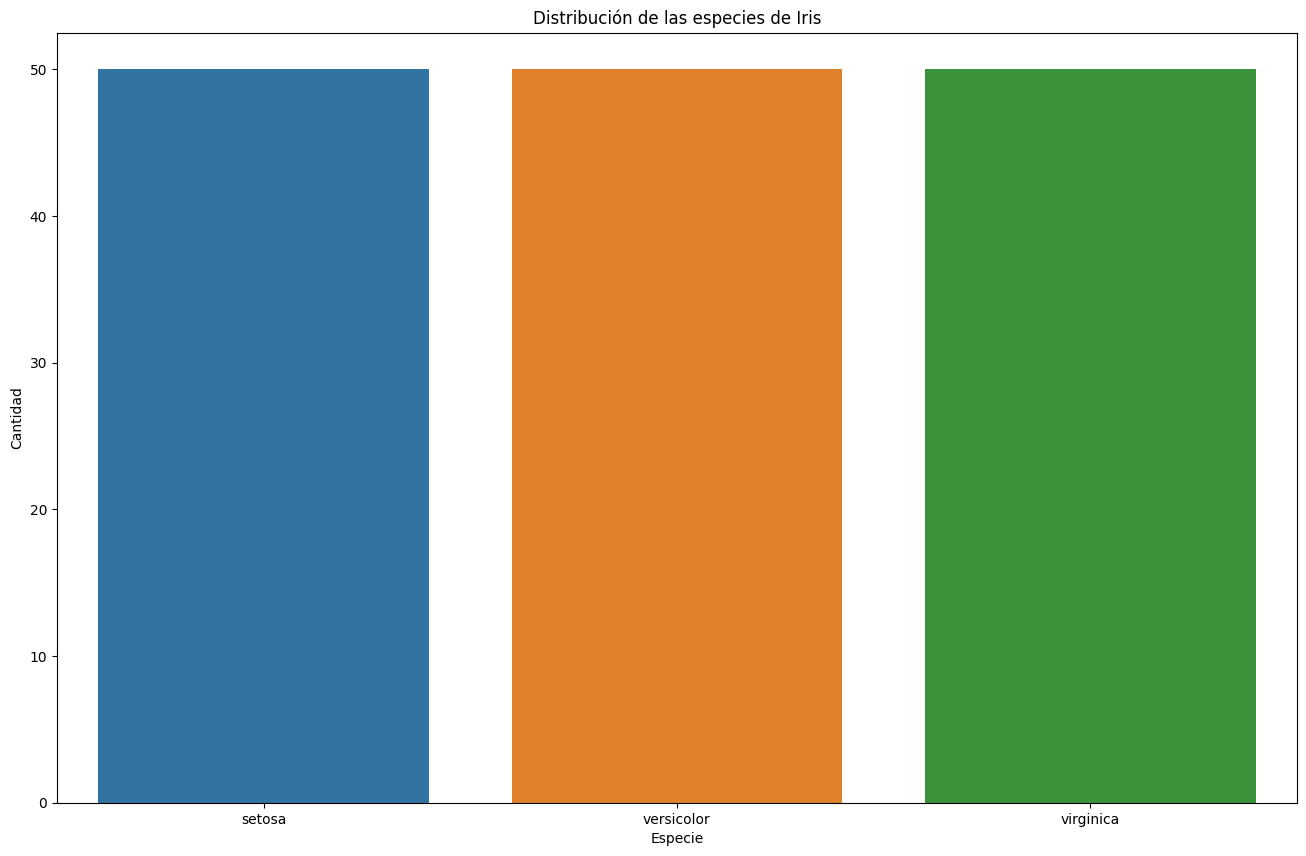

In [34]:
plt.figure(figsize=(16, 10))
sns.countplot(x="species", data=df, hue="species")
plt.title("Distribución de las especies de Iris")
plt.xlabel("Especie")
plt.ylabel("Cantidad")
plt.show()

## 4. Dividir el dataset en entrenamiento y prueba

Dividiremos el dataset en dos conjuntos: uno para entrenar el modelo (train) y otro para probar su rendimiento (test).

In [35]:
X = df.drop("species", axis=1)  # Características
y = df["species"]  # Variable objetivo (especie)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (105, 4)
Tamaño del conjunto de prueba: (45, 4)


## 5. Entrenar un modelo de clasificación
Usaremos el algoritmo *Random Forest* para entrenar un modelo de clasificación y un ejemplo de modelos ensemble (es decir que utilizan varios modelos individuales y utiliza el conjunto de esos modelos individuales para tomar una decisión). Random Forest es un algoritmo de aprendizaje supervisado que se puede utilizar tanto para tareas de clasificación como de regresión. 
<div style="text-align:center">
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*R3oJiyaQwyLUyLZL-scDpw.png" width="800" style="border: 1px solid black; border-radius: 10px;" alt="Random Forest">
<p><strong>Figura 2:</strong> Un diagrama de un <i>Random Forest</i> con 3 árboles de decisión.</p>
</div>
En pocas palabras, *Random Forest* crea una "colección" de árboles de decisión durante el entrenamiento y hace predicciones promediando las predicciones de cada árbol individual.

Un árbol de decisión es un modelo de aprendizaje supervisado que se utiliza para la clasificación y regresión. Dado un conjunto de datos, un árbol de decisión divide repetidamente los datos en subconjuntos más pequeños tratando de reducir la entropía o aumentar la homogeneidad de los subconjuntos resultantes hasta que se alcanza un punto de parada. El punto de parada puede ser una profundidad máxima, un número mínimo de muestras en un nodo, etc. 

En la siguiente imagen, se muestra un ejemplo de un árbol de decisión posible para el dataset Iris.


<div style="text-align:center">
<img src="https://miro.medium.com/v2/resize:fit:1400/1*YixFhULQldwywAdgiGHQ9A.png" width="1000" style="border: 1px solid black; border-radius: 10px;" alt="Árbol de decisión">
    <p><strong>Figura 3:</strong> Un árbol de decisión posible sobre el set de datos Iris.</p>
</div>
Nota: entropía es una medida de incertidumbre o desorden en un conjunto de datos.

Recordemos que para entrenar un modelo de aprendizaje supervisado, necesitamos un conjunto de datos de entrenamiento que contenga las características que queremos usar para predecir y necesitamos también el valor que queremos predecir. En este caso, las características son las medidas de las flores y el valor son las especies de las flores.

A las características se les llama usualmente "X" (pues son variables independientes) y al valor que queremos predecir se le llama "y" (pues es la variable dependiente).

In [36]:
random_forest = RandomForestClassifier(n_estimators=3, max_depth=4)
# para entrenar el modelo usamos la función fit y le pasamos nuestros datos de entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=3)

## 7. Evaluar el modelo

Finalmente, evaluaremos el rendimiento del modelo comparando las predicciones con las especies reales del conjunto de prueba.
Utilizaremos la matriz de confusión, que es una tabla que se utiliza para describir el rendimiento de un modelo de clasificación en un conjunto de datos de prueba para los cuales se conoce la verdadera clase. La matriz de confusión tiene 4 celdas, cada una representando un escenario diferente:

1. Verdaderos positivos (TP): Las predicciones correctas de la clase positiva.
2. Verdaderos negativos (TN): Las predicciones correctas de la clase negativa.
3. Falsos positivos (FP): Las predicciones incorrectas de la clase positiva.
4. Falsos negativos (FN): Las predicciones incorrectas de la clase negativa.

También usaremos una métrica básica de evaluación llamada exactitud (accuracy), que mide la proporción de predicciones correctas realizadas por el modelo, con respecto al total de predicciones realizadas.


Precisión del modelo: 1.00


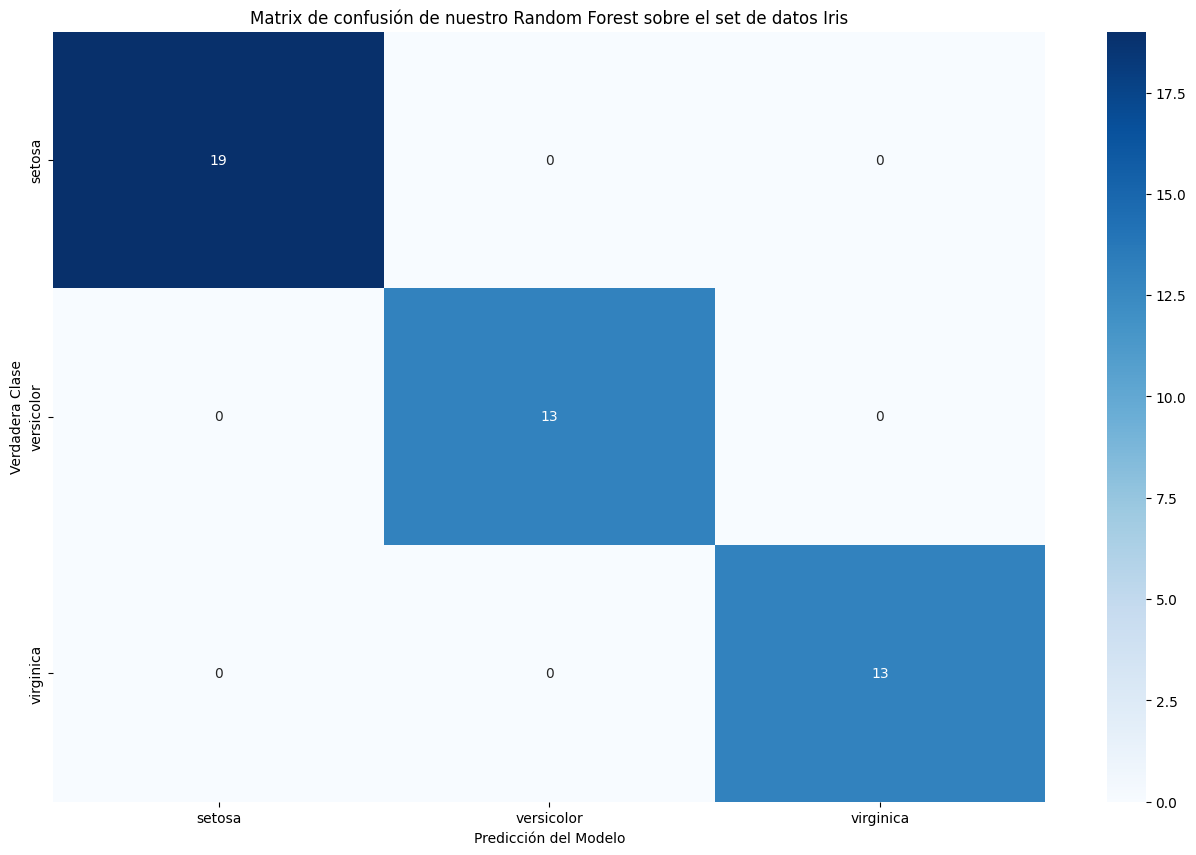

In [39]:
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16, 10))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=df["species"].unique().tolist(),
    yticklabels=df["species"].unique().tolist(),
)
plt.title("Matrix de confusión de nuestro Random Forest sobre el set de datos Iris")
plt.xlabel("Predicción del Modelo")
plt.ylabel("Verdadera Clase")
plt.show()